In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stroke = pd.read_csv("../00-data/healthcare-dataset-stroke-data.csv")

stroke


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
X = stroke.drop(['stroke', 'id'], axis=1)

y = stroke['stroke'].values

voglio poter tenere solo le 2 componenti principali per poter vedere tutto su un grafico, quindi imposterò k=2

In [4]:
k=2

facciamo il oneHotEncoding al dataset

In [5]:
toOHEncoding = [ 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in toOHEncoding:
  dummies = pd.get_dummies(X[col], prefix=col, dtype=int)
  X = pd.concat([X.drop(columns=[col]), dummies], axis=1)
    
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


verifichiamo le colonne a not a number

In [6]:
X.isnull().sum()

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
gender_Female                       0
gender_Male                         0
gender_Other                        0
ever_married_No                     0
ever_married_Yes                    0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Rural                0
Residence_type_Urban                0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

andiamo a standardizzare il dataset

In [7]:
X.shape

(5110, 21)

In [8]:
# 100:x=5110:201
100*201/5110

3.9334637964774952

il numero di righe a null è meno del 4%, direi che essendo poche la gestione migliore dei na è l'eliminazione

In [9]:
df_all = pd.concat([X, pd.Series(y, name='stroke')], axis=1)

df_all = df_all.dropna()

X = df_all.drop(columns=['stroke'])
y = df_all['stroke']

In [10]:
X = X.dropna()

In [11]:
X.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

ora standardizziamo il nostro dataset

In [12]:
X = (X-X.mean(axis=0))/X.std(axis=0)

In [13]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.070029,-0.318034,4.381522,2.777415,0.981245,-1.199820,1.200325,-0.014273,-0.729410,0.729410,...,-0.067088,0.86383,-0.432934,-0.397866,-0.985539,0.985539,-0.657859,2.205448,-0.778267,-0.420259
2,1.646395,-0.318034,4.381522,0.013840,0.459222,-1.199820,1.200325,-0.014273,-0.729410,0.729410,...,-0.067088,0.86383,-0.432934,-0.397866,1.014466,-1.014466,-0.657859,-0.453330,1.284645,-0.420259
3,0.271984,-0.318034,-0.228185,1.483980,0.701135,0.833289,-0.832938,-0.014273,-0.729410,0.729410,...,-0.067088,0.86383,-0.432934,-0.397866,-0.985539,0.985539,-0.657859,-0.453330,-0.778267,2.378998
4,1.602059,3.143674,-0.228185,1.549035,-0.623020,0.833289,-0.832938,-0.014273,-0.729410,0.729410,...,-0.067088,-1.15740,2.309352,-0.397866,1.014466,-1.014466,-0.657859,-0.453330,1.284645,-0.420259
5,1.690731,-0.318034,-0.228185,1.821183,0.013593,-1.199820,1.200325,-0.014273,-0.729410,0.729410,...,-0.067088,0.86383,-0.432934,-0.397866,-0.985539,0.985539,-0.657859,2.205448,-0.778267,-0.420259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,-1.324106,-0.318034,-0.228185,-0.050089,-1.310561,0.833289,-0.832938,-0.014273,1.370692,-1.370692,...,-0.067088,-1.15740,-0.432934,2.512899,1.014466,-1.014466,1.519773,-0.453330,-0.778267,-0.420259
5106,1.690731,-0.318034,-0.228185,0.447837,1.414142,0.833289,-0.832938,-0.014273,-0.729410,0.729410,...,-0.067088,-1.15740,2.309352,-0.397866,-0.985539,0.985539,-0.657859,-0.453330,1.284645,-0.420259
5107,-0.348718,-0.318034,-0.228185,-0.502318,0.217309,0.833289,-0.832938,-0.014273,-0.729410,0.729410,...,-0.067088,-1.15740,2.309352,-0.397866,1.014466,-1.014466,-0.657859,-0.453330,1.284645,-0.420259
5108,0.360655,-0.318034,-0.228185,1.372780,-0.419303,-1.199820,1.200325,-0.014273,-0.729410,0.729410,...,-0.067088,0.86383,-0.432934,-0.397866,1.014466,-1.014466,-0.657859,2.205448,-0.778267,-0.420259


In [14]:
X.shape

(4909, 21)

costruiamo la matrice varianza/covarianza

In [15]:
cov_mat = np.cov(X.T)

cov_mat

array([[ 1.00000000e+00,  2.74424873e-01,  2.57122776e-01,
         2.35838155e-01,  3.33397995e-01,  3.04566732e-02,
        -3.01492179e-02, -1.06743856e-02, -6.80781652e-01,
         6.80781652e-01,  1.33592907e-01, -7.93840158e-02,
         1.20021307e-01,  3.27347048e-01, -6.34936739e-01,
        -1.09481144e-02,  1.09481144e-02, -3.89576621e-01,
         2.42403662e-01,  1.24376551e-01,  7.68014609e-02],
       [ 2.74424873e-01,  1.00000000e+00,  1.15990991e-01,
         1.80542699e-01,  1.67810584e-01, -2.17298307e-02,
         2.18632362e-02, -4.54010568e-03, -1.62406260e-01,
         1.62406260e-01,  1.92316468e-02, -2.13406877e-02,
        -4.63665366e-03,  1.11794401e-01, -1.26560745e-01,
         1.07414618e-03, -1.07414618e-03, -1.43219450e-01,
         6.20778213e-02,  6.67165448e-02,  2.82143253e-02],
       [ 2.57122776e-01,  1.15990991e-01,  1.00000000e+00,
         1.54525119e-01,  4.13574429e-02, -8.28820729e-02,
         8.29829041e-02, -3.25745551e-03, -1.11245121e

Estraiamo gli autovalori e gli autovettori

In [16]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

vediamo gli autovalori e gli autovettori

In [17]:
eig_vals

array([ 4.05716803e+00,  2.08483288e+00,  2.00876360e+00,  2.54475557e-01,
        1.70552839e+00,  5.08916279e-01,  1.41875639e+00,  1.24223853e+00,
        7.37197912e-01,  8.12137979e-01,  1.15852731e+00,  1.09711718e+00,
        1.05751724e+00,  9.13985081e-01,  9.50268864e-01,  9.92568780e-01,
        1.97311076e-15, -1.29468488e-15, -9.55315725e-16,  6.10512062e-17,
       -9.95082962e-18])

In [18]:
eig_vecs[:,0]

array([-0.41537324, -0.15090915, -0.10559584, -0.13444775, -0.27057629,
       -0.04948603,  0.04934009,  0.00515878,  0.42108172, -0.42108172,
       -0.0729836 ,  0.0445954 , -0.13936081, -0.12831542,  0.39928043,
        0.00507443, -0.00507443,  0.31281704, -0.136242  , -0.12883155,
       -0.08385576])

riordiniamo gli autovalori in ordine crescente e usiamo i suoi indici per calcolare gli autovettori
```
np.argsort permette di riordinare una matrice
```

In [19]:
top_k_indexes = np.argsort(eig_vals)[:(-(k+1)):-1]

In [20]:
cov_mat

array([[ 1.00000000e+00,  2.74424873e-01,  2.57122776e-01,
         2.35838155e-01,  3.33397995e-01,  3.04566732e-02,
        -3.01492179e-02, -1.06743856e-02, -6.80781652e-01,
         6.80781652e-01,  1.33592907e-01, -7.93840158e-02,
         1.20021307e-01,  3.27347048e-01, -6.34936739e-01,
        -1.09481144e-02,  1.09481144e-02, -3.89576621e-01,
         2.42403662e-01,  1.24376551e-01,  7.68014609e-02],
       [ 2.74424873e-01,  1.00000000e+00,  1.15990991e-01,
         1.80542699e-01,  1.67810584e-01, -2.17298307e-02,
         2.18632362e-02, -4.54010568e-03, -1.62406260e-01,
         1.62406260e-01,  1.92316468e-02, -2.13406877e-02,
        -4.63665366e-03,  1.11794401e-01, -1.26560745e-01,
         1.07414618e-03, -1.07414618e-03, -1.43219450e-01,
         6.20778213e-02,  6.67165448e-02,  2.82143253e-02],
       [ 2.57122776e-01,  1.15990991e-01,  1.00000000e+00,
         1.54525119e-01,  4.13574429e-02, -8.28820729e-02,
         8.29829041e-02, -3.25745551e-03, -1.11245121e

calcolo la matrice degli autovettori rimanenti

In [21]:
W = eig_vecs[:,top_k_indexes]

W

array([[-0.41537324, -0.07817244],
       [-0.15090915, -0.08896256],
       [-0.10559584, -0.16646542],
       [-0.13444775, -0.12772154],
       [-0.27057629,  0.00262745],
       [-0.04948603,  0.64423367],
       [ 0.04934009, -0.64420238],
       [ 0.00515878, -0.00276557],
       [ 0.42108172,  0.05032955],
       [-0.42108172, -0.05032955],
       [-0.0729836 , -0.03164406],
       [ 0.0445954 ,  0.00984004],
       [-0.13936081,  0.13767735],
       [-0.12831542, -0.09310108],
       [ 0.39928043, -0.07055095],
       [ 0.00507443,  0.04251299],
       [-0.00507443, -0.04251299],
       [ 0.31281704, -0.07156123],
       [-0.136242  , -0.14178708],
       [-0.12883155,  0.20677014],
       [-0.08385576, -0.03930816]])

uso la matrice di trasformazione per ridurre lo spazio dimensionale

In [22]:
pc = np.dot(X,W)
pc

array([[-2.57325611, -3.05152135],
       [-2.18309272, -1.77139944],
       [-1.57874163,  0.82926073],
       ...,
       [-1.00388733,  1.30325167],
       [-1.2037325 , -1.88293639],
       [ 0.03538029,  0.67227631]], shape=(4909, 2))

ho trasformato il mio spazio in uno spazio bidimensionale, a questo punto stampo il risultato come un cluster

Text(0, 0.5, 'Seconda componente principale')

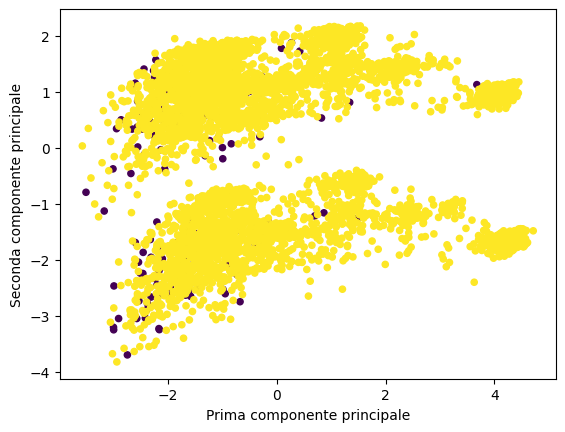

In [23]:
plt.scatter(pc[:,0], pc[:,1], s=20, c=1-y, cmap='viridis')
plt.xlabel("Prima componente principale")
plt.ylabel("Seconda componente principale")

In [24]:
X.shape

(4909, 21)

apparentemente sembrano esserci 2 cluster distinti i quali contengono sia elementi a 0 che elementi a 1, la forma è rimasta invariata quindi sembra che il risultato della pca sia veramente questo.
Ora vorrei splittare e stampare tutti gli elementi a 0 in uno scatterplot, gli elementi a 1 in un altro

In [25]:
df_all = pd.concat([pd.DataFrame(pc), pd.Series(y, name='stroke')], axis=1)

df_all

,0,1,stroke
0,-2.573256,-3.051521,1.0
1,-2.183093,-1.771399,NaN
2,-1.578742,0.829261,1.0
3,-2.385018,0.578582,1.0
4,-1.953926,-2.213097,1.0
...,...,...,...
5104,NaN,NaN,0.0
5106,NaN,NaN,0.0
5107,NaN,NaN,0.0
5108,NaN,NaN,0.0


In [26]:
df_zero = df_all[df_all['stroke'] == 0]
df_one = df_all[df_all['stroke'] == 1]

In [27]:
df_zero

,0,1,stroke
249,-1.228377,-1.673432,0.0
250,4.138932,-1.826902,0.0
251,4.374360,-1.522536,0.0
252,3.874451,0.964888,0.0
253,-1.950845,-2.175143,0.0
...,...,...,...
5104,NaN,NaN,0.0
5106,NaN,NaN,0.0
5107,NaN,NaN,0.0
5108,NaN,NaN,0.0


In [28]:
df_one

,0,1,stroke
0,-2.573256,-3.051521,1.0
2,-1.578742,0.829261,1.0
3,-2.385018,0.578582,1.0
4,-1.953926,-2.213097,1.0
5,-2.310866,-1.957260,1.0
...,...,...,...
243,-0.508609,0.811548,1.0
244,2.380284,-1.621725,1.0
245,-0.723725,1.100490,1.0
246,0.991704,1.887958,1.0


In [29]:
X_zero = df_zero.drop(columns=['stroke'])
y_zero = df_zero['stroke']

In [33]:
X_zero.shape

(4700, 2)

In [31]:
X_one = df_one.drop(columns=['stroke'])
y_one = df_one['stroke']

Text(0, 0.5, 'Seconda componente principale')

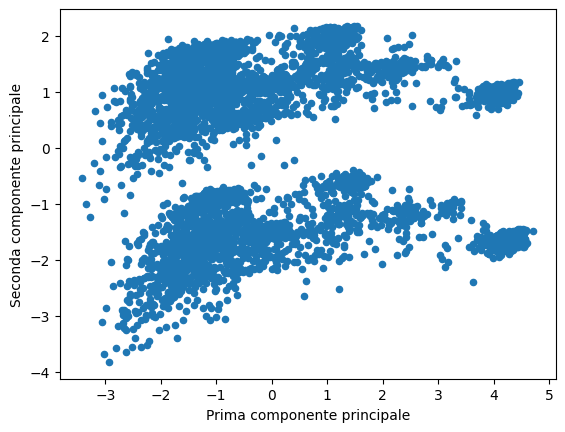

In [34]:
plt.scatter(X_zero.values[:,0], X_zero.values[:,1], s=20)
plt.xlabel("Prima componente principale")
plt.ylabel("Seconda componente principale")

Text(0, 0.5, 'Seconda componente principale')

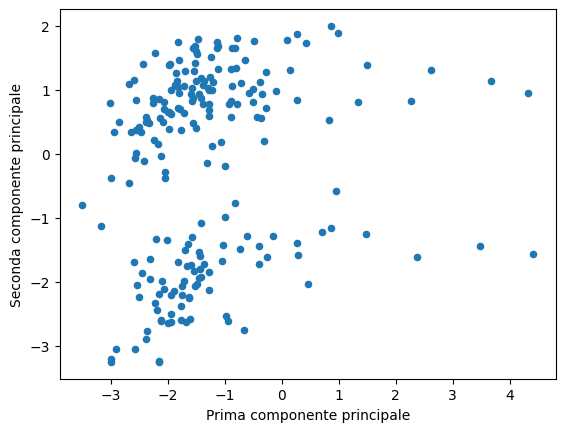

In [35]:
plt.scatter(X_one.values[:,0], X_one.values[:,1], s=20)
plt.xlabel("Prima componente principale")
plt.ylabel("Seconda componente principale")